In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

## Data

In [3]:
data = pd.read_csv('full_data_clustered_ssim_V4.csv')
data = data.replace(np.nan,'None')
data = data.drop(columns=['cluster','cluster_2'])
data.columns

Index(['CVE ID', 'Publish Date', 'Update Date',
       'Number Of Related Vulnerabilities', 'index', 'CWE ID',
       'Vulnerability Type(s)', 'Score', 'Access', 'Complexity',
       'Authentication', 'Conf.', 'Integ.', 'Avail', 'CVE Summary',
       'Vulnerability Name', 'Vulnerability Description', 'CLEAN TEXT',
       'CI SCORE', 'CI SCORE GLOVE', 'CI SCORE GLOVE 2', 'CI SCORE GLOVE 50'],
      dtype='object')

## OHE

In [4]:
labelencd_cols = ['Vulnerability Type(s)','Vulnerability Name','Access','Complexity','Authentication','Conf.','Integ.','Avail']

ohe = pd.concat([
    pd.get_dummies(data[labelencd_cols], dtype=int), 
    data['Score'],
    data['Number Of Related Vulnerabilities'],
    data['CI SCORE']
], axis=1)

ohe

,Vulnerability Type(s)_+Info,Vulnerability Type(s)_+Info CSRF,Vulnerability Type(s)_+Info File Inclusion,Vulnerability Type(s)_+Priv,Vulnerability Type(s)_+Priv +Info,Vulnerability Type(s)_+Priv Bypass,Vulnerability Type(s)_+Priv Bypass +Info,Vulnerability Type(s)_+Priv CSRF,Vulnerability Type(s)_+Priv Dir. Trav.,Vulnerability Type(s)_+Priv Mem. Corr.,...,Integ._None,Integ._Partial,Integ._Unknown,Avail_Complete,Avail_None,Avail_Partial,Avail_Unknown,Score,Number Of Related Vulnerabilities,CI SCORE
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,4.3,22413.0,0.666677
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,7.5,3011.0,0.625171
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,5.8,754.0,0.636100
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,5.0,9380.0,0.719175
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,2.1,394.0,0.707726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61693,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,4.3,22413.0,0.706891
61694,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,5.0,1320.0,0.789261
61695,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,5.8,754.0,0.696738
61696,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,4.3,22413.0,0.711290


In [5]:
# from sklearn.preprocessing import MinMaxScaler,StandardScaler

# cols_to_scale = ['Score','Number Of Related Vulnerabilities']
# scaler = StandardScaler()
# s_n = scaler.fit_transform(data[cols_to_scale])
# pd.DataFrame(s_n,columns=cols_to_scale)

# ohe = pd.concat([
#     pd.get_dummies(data[labelencd_cols], dtype=int), 
#     pd.DataFrame(s_n,columns=cols_to_scale)
# ], axis=1)

# ohe

## KMeans

In [6]:
# fit the preprocessed data
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k)
kmeans_clusters = kmeans.fit_predict(ohe)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
kmeans_clusters

array([1, 0, 0, ..., 0, 1, 0])

In [8]:
cluster_map = pd.DataFrame()
# cluster_map['data_index'] = ohe.index.values
cluster_map['index_clustermap'] = range(1,len(ohe)+1)
cluster_map['Kmeans_clusters'] = kmeans.labels_
cluster_map['Kmeans_clusters'].value_counts()

Kmeans_clusters
0    51386
1    10312
Name: count, dtype: int64

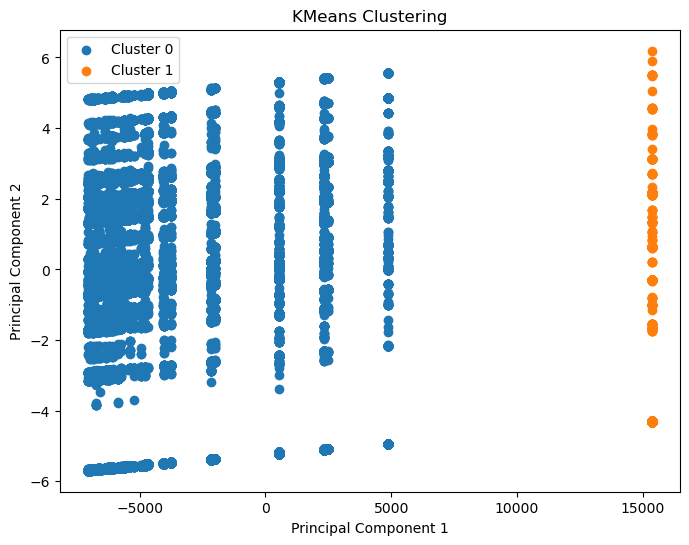

In [9]:
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(ohe)

# Plotting the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(reduced_data[kmeans_clusters == i, 0], reduced_data[kmeans_clusters == i, 1], label=f'Cluster {i}')

plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


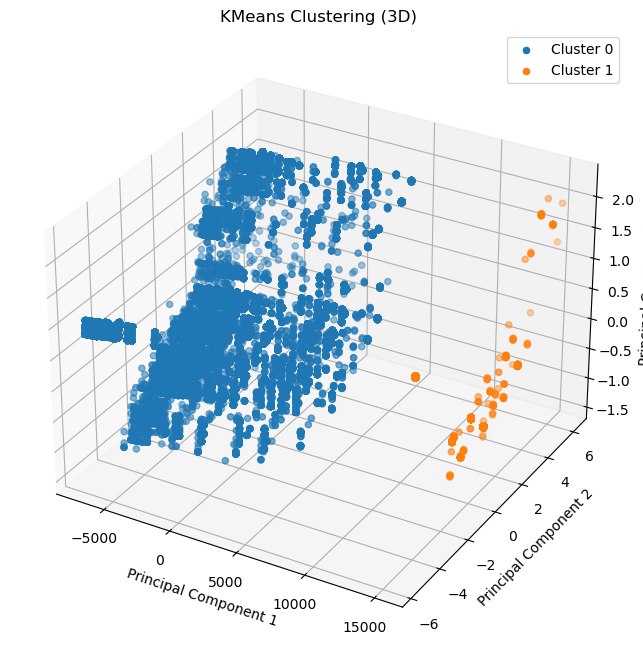

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 3 dimensions
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(ohe)

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(reduced_data[kmeans_clusters == i, 0], reduced_data[kmeans_clusters == i, 1], 
               reduced_data[kmeans_clusters == i, 2], label=f'Cluster {i}')

ax.set_title('KMeans Clustering (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [11]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score



# Calculate the silhouette score (ranges from -1 to 1, higher is better)
silhouette_avg = silhouette_score(ohe, kmeans_clusters)
print("Silhouette Score:", silhouette_avg)

# Calculate the Davies-Bouldin index (lower is better)
davies_bouldin_avg = davies_bouldin_score(ohe, kmeans_clusters)
print("Davies-Bouldin Index:", davies_bouldin_avg)

# Calculate the Calinski ()
calinski_harabasz_score_avg = calinski_harabasz_score(ohe, kmeans_clusters)
print("Calinski Score:", calinski_harabasz_score_avg)

# Get the sum of squared distances of samples to their closest cluster center (inertia)
inertia = kmeans.inertia_
print("Inertia:", inertia)


Silhouette Score: 0.8037237404992833
Davies-Bouldin Index: 0.1719203675905321
Calinski Score: 276843.5960933902
Inertia: 650391861506.6846
